# Baseball Case Study

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')


__Problem Statement__:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- __Input features__: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- __Output__: Number of predicted wins (W)

#### Terminology:
- R – Runs scored: times reached home plate legally and safely
- 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
- BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first   base.
- AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error 
- H (or HA) – Hits allowed: total hits allowed
- ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- ER – Earned run: number of runs that did not occur as a result of errors or passed balls
- K (or SO) – Strikeout: number of batters who received strike three
- SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.
- RA – Run average: number of runs allowed times nine divided by innings pitched.
- CG – Complete game: number of games where player was the only pitcher for their team
- SHO – Shutout: number of complete games pitched with no runs allowed
- SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering    the lead.
- E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.
- W(Target Variable) - Win: number of games where pitcher was pitching while their team took the lead and went on to win

Also, __this is a regression problem__ as the target variable in the dataset is a continuous variable, not a category for which classification algorithms are used.

In [3]:
df = pd.read_csv("Baseball.csv")

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
df.shape

(30, 17)

So, our dataset is a relatively small dataset with a lot of features but a small amount of samples. To create an effective model, its better to have more samples for the model to create generalization and predict as correctly as possible.

In [9]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Let's check the null values , and impute them if there are any.

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [13]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

We can conclude that this dataet doesn't have any null values and categorical features which means we won't be requiring any encoding technique to be implemented here.

In [15]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### The data looks fairly clean as there aren't many features with outliers. 

We can therefore proceed to the next step of Exploratory data Analysis:

# EDA: 

In [47]:
def visualize(df,col):
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)                     # for 1st column we will create a regplot which will check the corr with the target variable
    sns.regplot(x=col,y='W',data=df)
    plt.subplot(1,3,2)                     # for 2nd column, we will create a box plot to check for outliers in the EDA itself as this is a small dataset and its easier to do it here.
    sns.boxplot(y=col,data=df)
    plt.subplot(1,3,3)                     # for 3rd column, we will create a histplot to check the distribution of the feature 
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

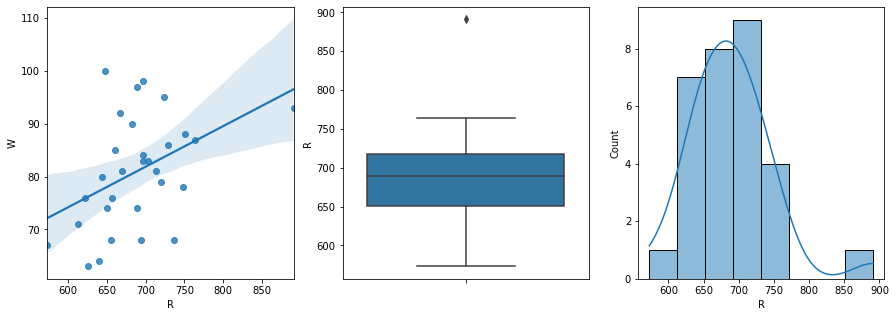

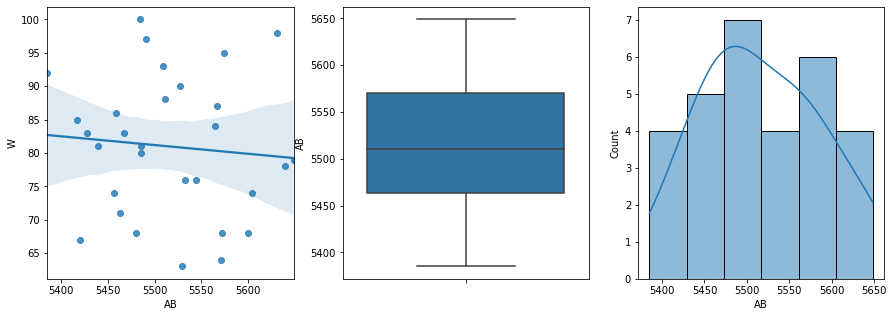

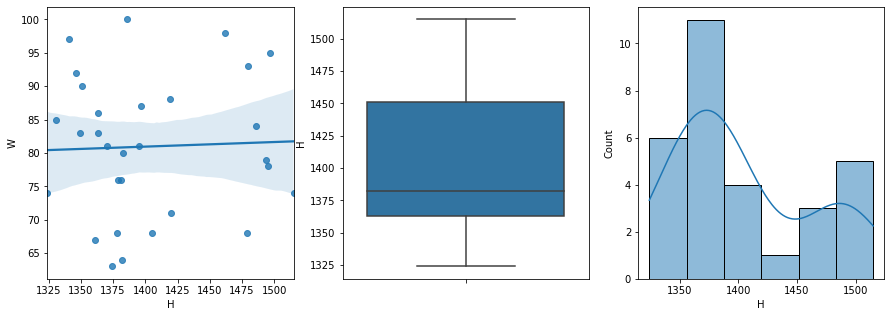

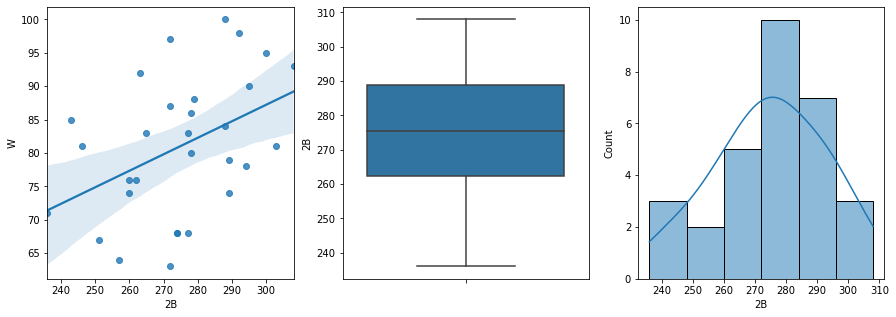

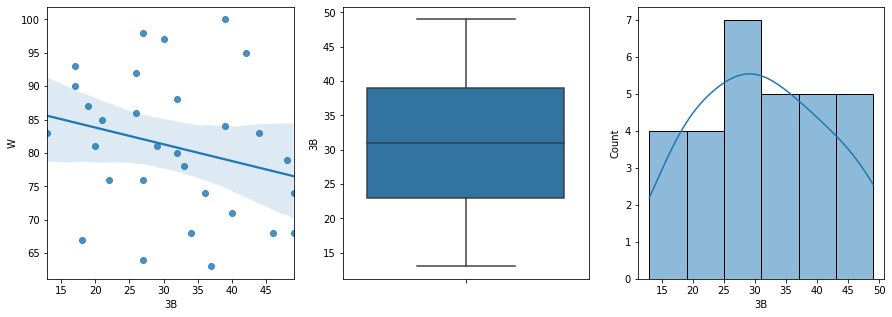

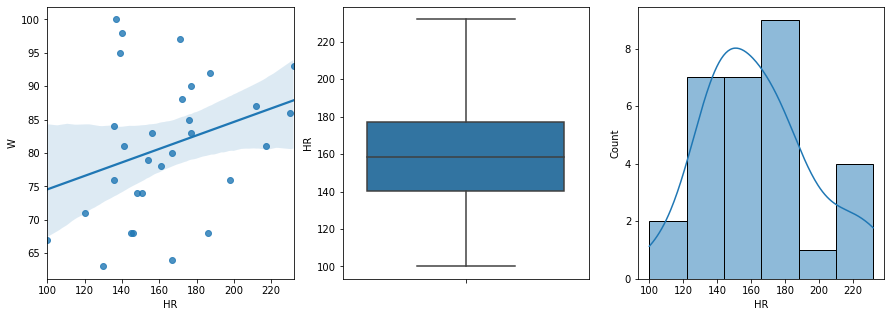

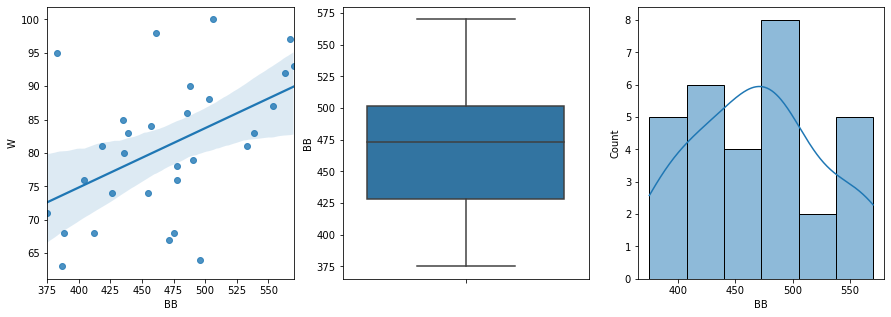

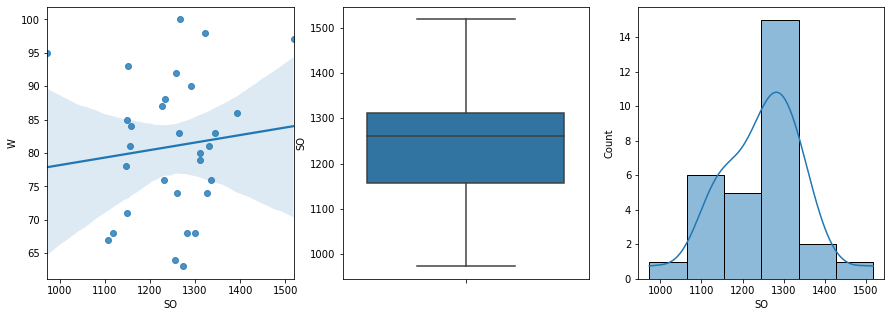

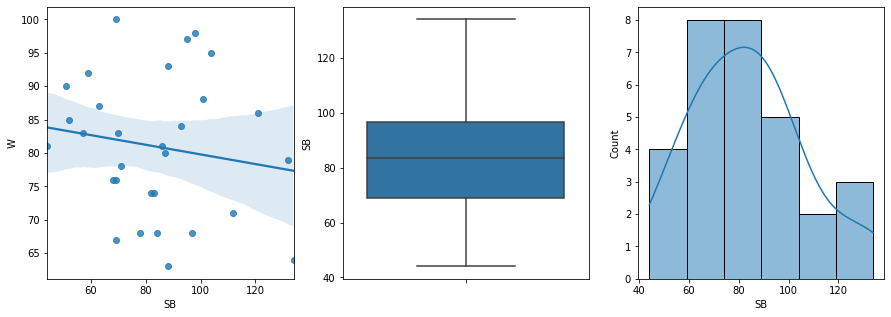

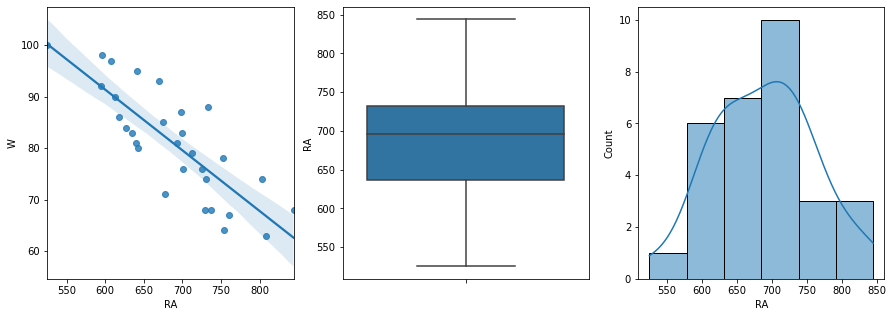

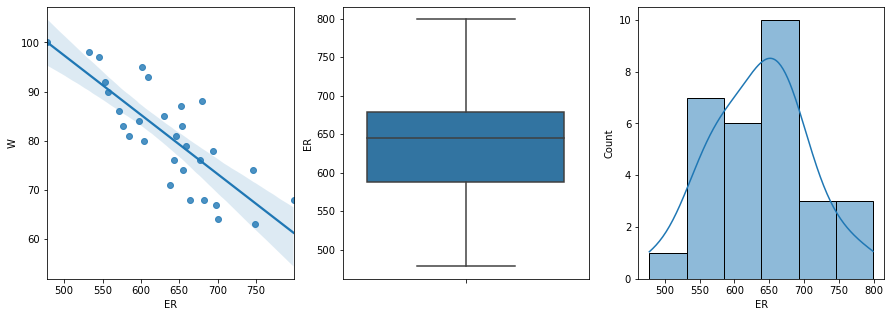

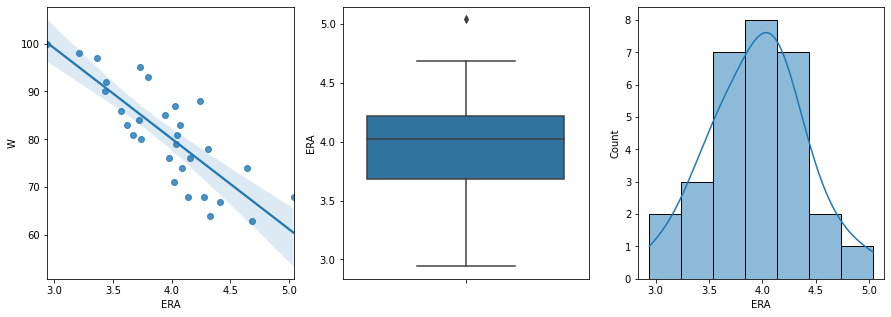

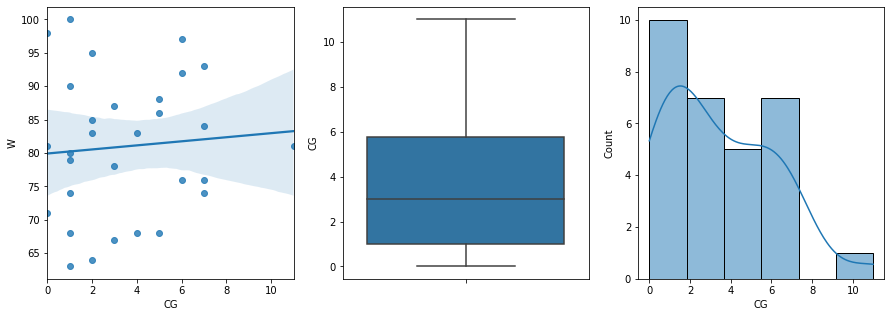

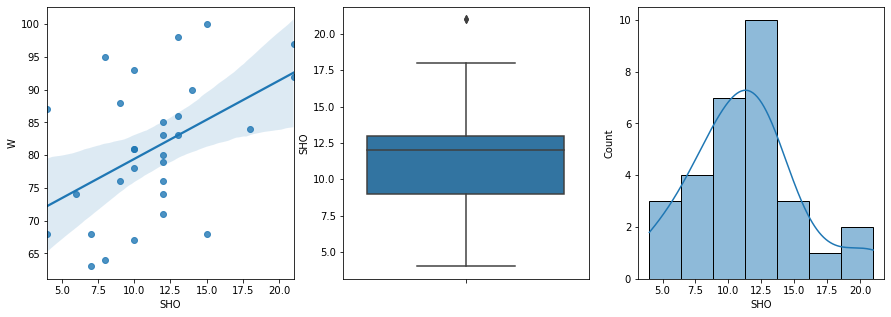

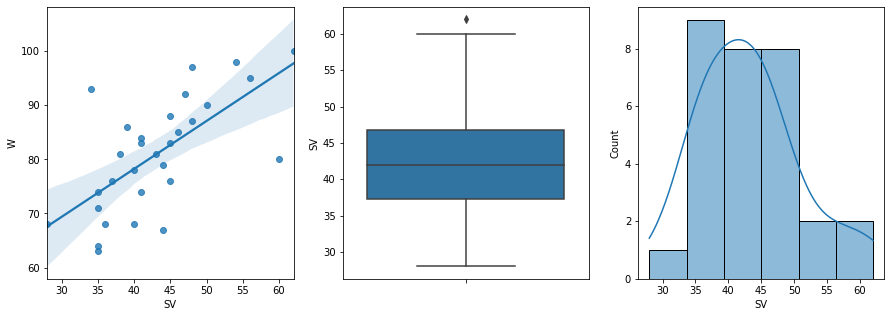

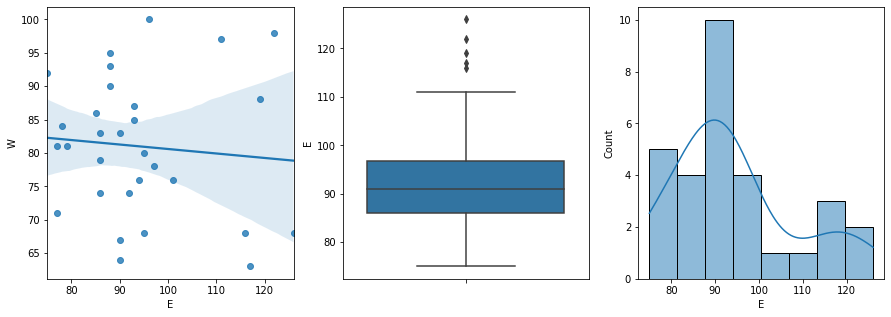

In [50]:
for i in df.columns[1:]:
    visualize(df,i)
#Plotting graphs at once so to make a list of observations and make it more clear to the reader.

Observations:
- Wins and Runs are positively related linearly and there are outliers present between 850 to 900. Distribution is Normal.
- Wins and AB(At Bat) are slightly negatively related linearly and there are no outliers present. Distribution is Normal.
- Wins and H(Hits allowed) are weakly positively related and there are no outliers present. Distribution is not Normal.
- Wins and 2B(Double) are positively related and there are no outliers present. Distribution is slightly skewed.
- Wins and 3B(Triple) are negatively related and there are no outliers present. Distribution is somewhat normal.
- Wins and HR(Home Run) are positively related and there are no outliers present. Distribution is slightly skewed.
- Wins and BB(Walk) are positively related and there are no outliers present. Distribution is slightly skewed.
- Wins and SO(StrikeOut) are weakly positively related and there are no outliers present. Distribution is somewhat normal.
- Wins and SB(Stolen Base) are negatively related and there are no outliers present. Distribution is normal.
- Wins and RA(Run Average) are strongly negatively related and there are no outliers present. Distribution is somewhat normal.
- Wins and ER(Earned Run) are strongly negatively related and there are no outliers present. Distribution is somewhat normal.
- Wins and ERA(Earned Run Average) are strongly negatively related and there are outliers present at 5.0. Distribution is normal.
- Wins and CG(Complete Game) are slightly positively related and there are no outliers present. Distribution is not normal.
- Wins and SHO(ShutOut) are positively related and there are no outliers present. Distribution is normal.
- Wins and SV(Save) are positively related and there are outliers present above the range of 60. Distribution is somewhat normal.
- Wins and E(Errors) are slightly negatively related and there are many outliers present after 110. Distribution is not normal.

__All of this can be visually represented in an aesthetic way by creating a heatmap and checking correlation of input features with the target variable and also with each other__

<AxesSubplot:>

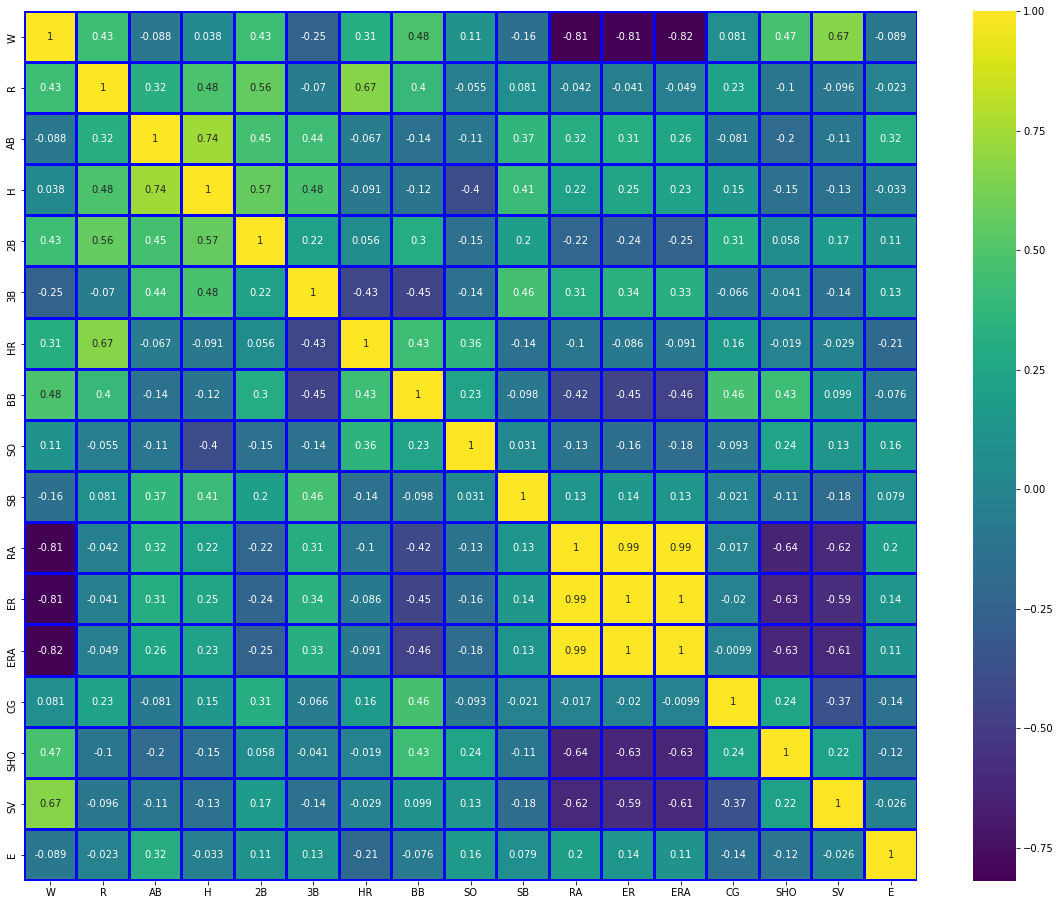

In [78]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True, linecolor="blue", linewidth="2",cmap="viridis")

# Data Transformation:

## Outlier Removal:

In [149]:
z = np.abs(zscore(df))
z.shape

(30, 17)

In [150]:
#np.where returns the index where the data points are outliers
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [151]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


#### There was one outlier which has been now removed. Let's calculate the Data Loss %

### Data Loss:

In [152]:
loss_percent= (30-29)/30*100
print(loss_percent)

3.3333333333333335


There's only 3.33% data loss which is totaly alright as its below the usual limit of 8%

## Skewness:

In [153]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [154]:
df_new.skew().loc[abs(df_new.skew())>0.5]        # to check which features have skewness above 0.5 (we take absolute value which is efficient than using or operator)

H      0.783772
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

We need only 5 columns to be transformed as this is outside the general limit of +/- 0.5. 

In [155]:
transcol=["H","CG","SHO","SV","E"]
for i in transcol:
    df_new[i]=np.sqrt(df_new[i])

In [156]:
df_new.skew().loc[abs(df_new.skew())>0.5]

H    0.761274
E    0.714966
dtype: float64

As we can see, out of the 5 columns, only 2 remain whose skewness is still outside the range but there has been a considerable decrease in skewness of input feature "E". We can use for loops to implement this instead of manually writing the feature names, but here it was only 5 columns and it's easier for the reader to understand it in this way.

<AxesSubplot:>

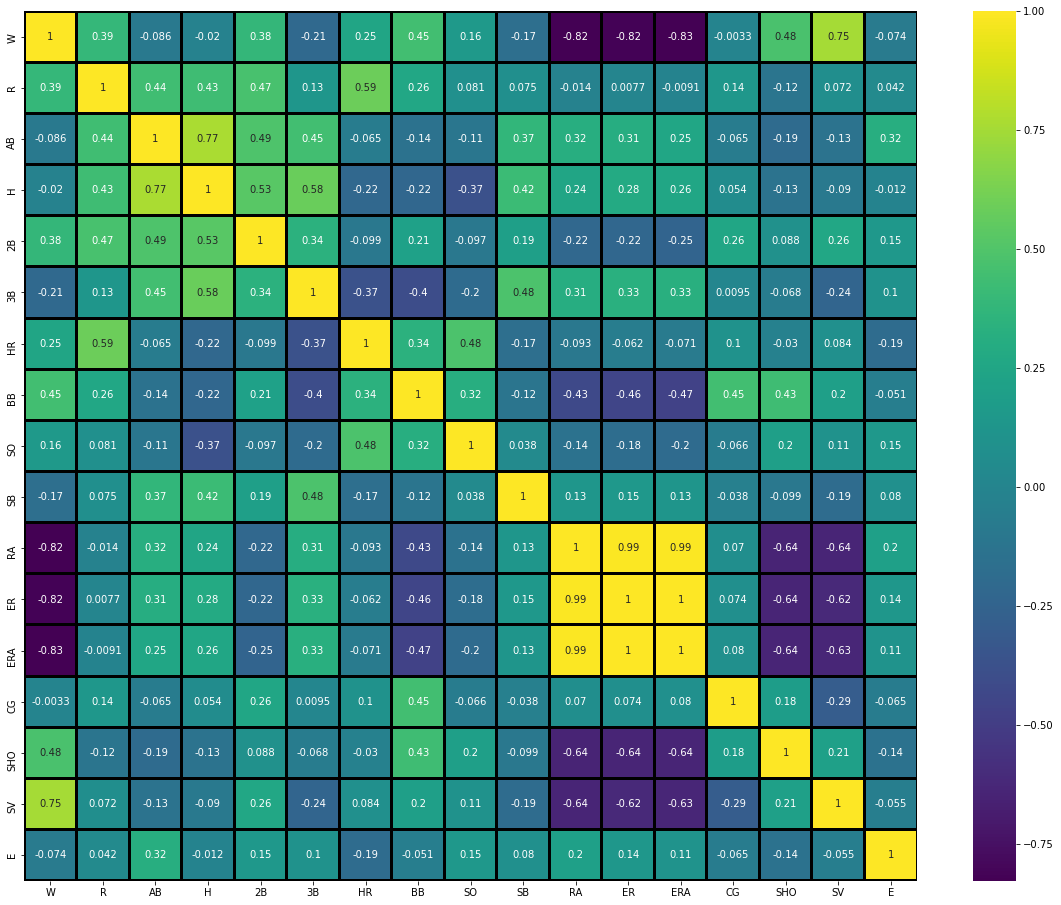

In [157]:
plt.figure(figsize=(20,16))
sns.heatmap(df_new.corr(),annot=True, linecolor="black", linewidth="2",cmap="viridis")

As evident from the heatmap above, we can see that there is extreme collinearity in some input features even after data transformation. Hence after checking Multicollinearity ,we can check the correlation again to understand what has changed and has it reduced the collinearity between input features. 

## Scaling the input features:

In [158]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df_new)
df_scaled=pd.DataFrame(df_scaled,columns=df_new.columns)

In [159]:
df_scaled

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.416025,0.959398,0.830084,1.731088,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.253549,-0.777436,1.602631,-0.454325
1,0.239947,0.331147,-0.702831,-0.944305,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.253549,0.247475,0.255621,-0.607619
2,0.043934,-0.274666,-1.100253,-0.097707,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.020463,-0.239162,-0.689393,-1.158698
3,-0.446099,-1.329231,0.233951,-0.353870,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.218547,-0.500806,-0.831290,0.502274
4,-0.642112,0.174084,1.255894,2.047274,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.218547,0.247475,-1.120956,-0.607619
5,0.631973,1.856900,0.716535,-0.061217,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.126372,-2.113126,0.637942,-0.078546
6,0.043934,0.712585,-0.447345,-0.556053,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.944003,-0.239162,-0.006384,-1.320594
7,-0.054073,-0.835605,-0.447345,-0.317196,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.748671,0.247475,2.059075,0.068929
8,-0.250086,1.497899,1.752672,1.695839,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.126372,-0.239162,-0.411095,0.214859
9,0.729980,1.565212,-0.078310,0.338457,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.728839,-0.500806,0.255621,1.730239


Now we are done with Data Transformation steps, we can now proceed to check the __Multicollinearity__ and therefore select appropriate features for model building.

In [160]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [161]:
X=df_scaled.drop("W",axis=1)
calc_vif(X)

,variables,VIF
0,R,7.116703
1,AB,17.861133
2,H,9.390295
3,2B,3.732577
4,3B,3.139536
5,HR,8.526546
6,BB,3.383955
7,SO,2.747217
8,SB,1.959083
9,RA,194.613528


As we can see that Multicollinearity is really high among R,ER and ERA, so it would be better to drop 2 columns(RA- run average and ER-Earned run) whose information has been captured by ERA which is the earned run average and we can drop At bat(AB) as its VIF is high as well. 

In [162]:
df_scaled=df_scaled.drop(["RA","ER"],axis=1)


Now, lets check the vif again.

In [163]:
X=df_scaled.drop("W",axis=1)
calc_vif(X)

,variables,VIF
0,R,6.383490
1,AB,4.688365
2,H,7.585494
3,2B,3.390674
4,3B,3.038581
5,HR,6.391372
6,BB,3.099793
7,SO,2.207733
8,SB,1.757790
9,ERA,4.946995


<AxesSubplot:>

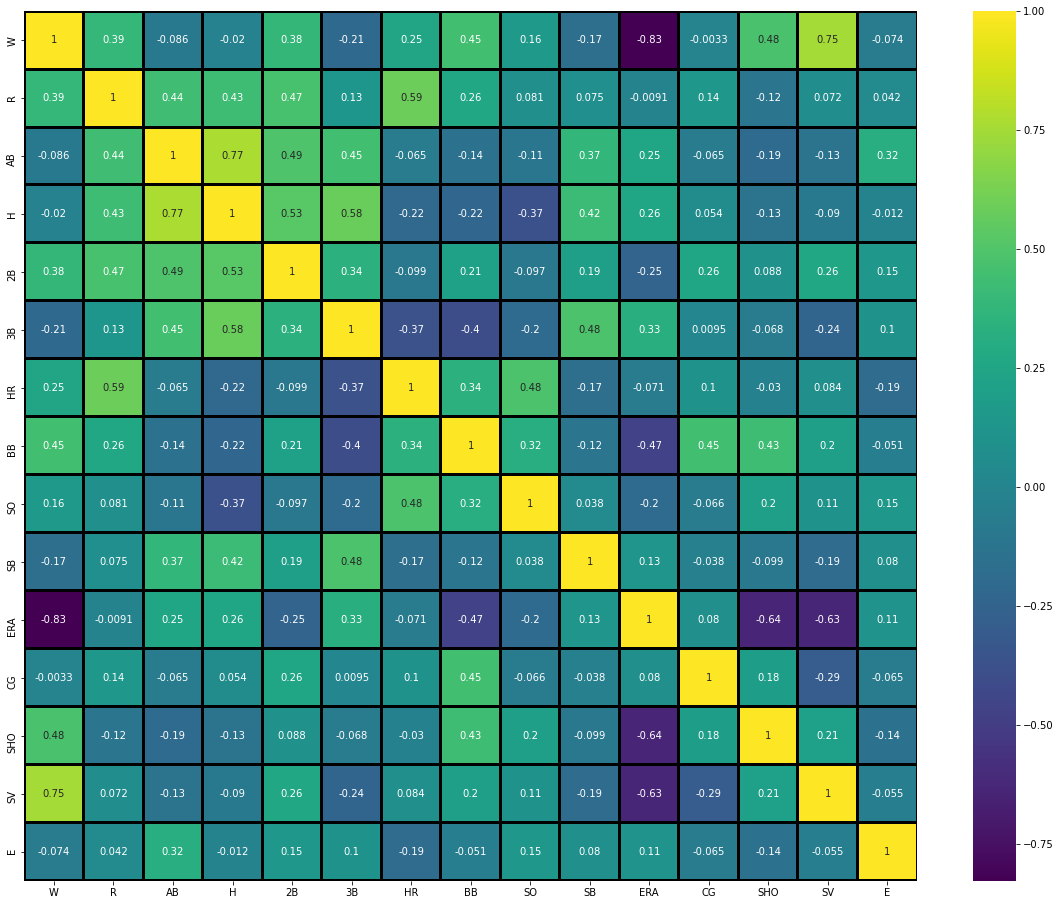

In [164]:
plt.figure(figsize=(20,16))
sns.heatmap(df_scaled.corr(),annot=True, linecolor="black", linewidth="2",cmap="viridis")

## Dividing the dataset:

In [165]:
x = df_scaled.drop("W",axis=1)
y = df_scaled["W"]

In [166]:
x.shape

(29, 14)

In [167]:
y.shape

(29,)

# Model 1 : Linear Regression

In [169]:
for i in range(0,1000):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        
        print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
        print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
        print("\n")

We can see at the random state = 99, the difference is the lowest hence we'll choose this as our random state for Linear Regression

In [283]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [172]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr= lr.predict(X_test)

In [173]:
lrr2 = r2_score(y_test,pred_lr)

for k in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lrr2*100)
    print("\n")

At cv=  2
Cross Val score :  -204.54400056609862
r2 score is :  89.91022801526779


At cv=  3
Cross Val score :  30.059644925379914
r2 score is :  89.91022801526779


At cv=  4
Cross Val score :  29.457440894147368
r2 score is :  89.91022801526779


At cv=  5
Cross Val score :  31.032265295592275
r2 score is :  89.91022801526779


At cv=  6
Cross Val score :  25.678790866319233
r2 score is :  89.91022801526779


At cv=  7
Cross Val score :  10.145298840311582
r2 score is :  89.91022801526779


At cv=  8
Cross Val score :  31.97358425939
r2 score is :  89.91022801526779


At cv=  9
Cross Val score :  -728.1772906478853
r2 score is :  89.91022801526779




In [174]:
lsscore_selected = cross_val_score(lr,x,y,cv = 8).mean()
print("The cv score is: ", lsscore_selected, "\nThe r2 score is: ",lrr2)

The cv score is:  0.31973584259390003 
The r2 score is:  0.8991022801526779


This sort of shows that the model is suffering from extreme overfitting. We can use Regularization Techniques like l1 and l2 to reduce.

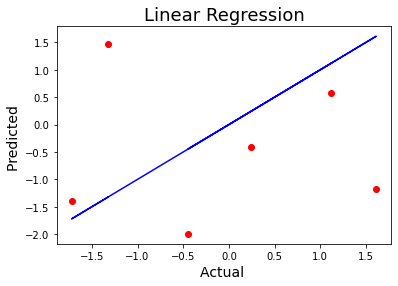

In [175]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [176]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))

MAE: 0.29544123794352656
MSE: 0.1478493647540671
RMSE: 0.38451185255342535


<AxesSubplot:xlabel='W', ylabel='Density'>

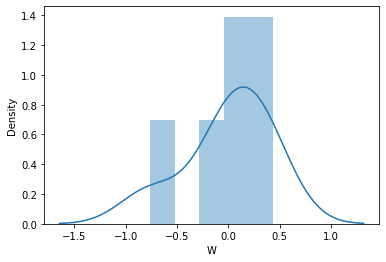

In [209]:
sns.distplot((y_test-pred_lr),bins=5)

# Model 2 : Decision Tree Regressor

In [177]:
dt_reg_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [6, 8, 10],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              "splitter":["best", "random"]}
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(X_train, y_train)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)
print("best r2 score: ",grid_dt_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 10, 'splitter': 'best'}
best r2 score:  -0.2200372623970782
------------------------------------------


In [178]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth= 6, max_leaf_nodes= 5, min_samples_leaf= 20, min_samples_split= 10, splitter="best")
dtr.fit(X_train, y_train)
pred_dtr= dtr.predict(X_test)

In [179]:
dtrr2 = r2_score(y_test,pred_dtr)

for k in range(2,10):
    dtrscore=cross_val_score(dtr,x,y,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  -19.58666149463871
r2 score is :  -0.8163102336858463


At cv=  3
Cross Val score :  -30.984579970101358
r2 score is :  -0.8163102336858463


At cv=  4
Cross Val score :  -19.421421495904696
r2 score is :  -0.8163102336858463


At cv=  5
Cross Val score :  -38.84940924358672
r2 score is :  -0.8163102336858463


At cv=  6
Cross Val score :  -28.54223035714013
r2 score is :  -0.8163102336858463


At cv=  7
Cross Val score :  -44.366344504090364
r2 score is :  -0.8163102336858463


At cv=  8
Cross Val score :  -74.44900348487793
r2 score is :  -0.8163102336858463


At cv=  9
Cross Val score :  -2877.9650921323723
r2 score is :  -0.8163102336858463




In [181]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_dtr))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

MAE: 1.078071901204827
MSE: 1.4773007207154454
RMSE: 1.2154426028058443


<AxesSubplot:xlabel='W', ylabel='Density'>

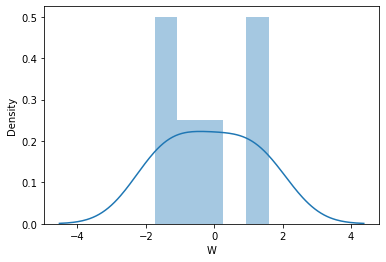

In [208]:
sns.distplot((y_test-pred_dtr),bins=5)

# Model 3: Lasso Regression

In [262]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [284]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)

In [285]:
lss = r2_score(y_test,pred_ls)

for k in range(2,10):
    lsscore=cross_val_score(ls,x,y,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  70.02462387084772
r2 score is :  87.1320598065134


At cv=  3
Cross Val score :  66.97471504200267
r2 score is :  87.1320598065134


At cv=  4
Cross Val score :  75.46599169430482
r2 score is :  87.1320598065134


At cv=  5
Cross Val score :  47.09279864221958
r2 score is :  87.1320598065134


At cv=  6
Cross Val score :  56.91755268201497
r2 score is :  87.1320598065134


At cv=  7
Cross Val score :  40.47290002182398
r2 score is :  87.1320598065134


At cv=  8
Cross Val score :  53.279834342167874
r2 score is :  87.1320598065134


At cv=  9
Cross Val score :  -317.32969932941415
r2 score is :  87.1320598065134




In [286]:
lsscore_selected = cross_val_score(ls,x,y,cv = 4).mean()
print("The cv score is: ", lsscore_selected, "\nThe r2 score is: ",lss)

The cv score is:  0.7546599169430481 
The r2 score is:  0.871320598065134


As we can see there has been a considerable improvement in our data as overfitting has reduced and cross validation has increased tremendously

In [292]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ls))
print('MSE:', metrics.mean_squared_error(y_test, pred_ls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ls)))

MAE: 0.373792526159378
MSE: 0.18855894723678582
RMSE: 0.4342337472338899


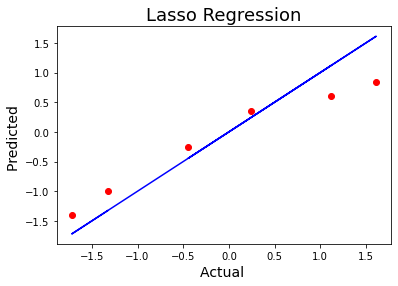

In [293]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

The graph has improved a lot and is now much closer to the line showing that overfitting has reduced by a lot.

<AxesSubplot:xlabel='W', ylabel='Density'>

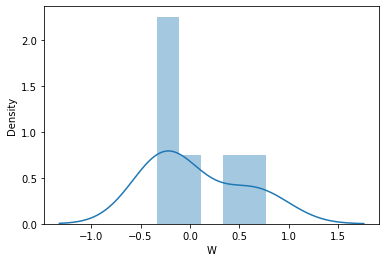

In [294]:
sns.distplot((y_test-pred_ls),bins=5)

# Model 4: Ridge Regression

In [263]:
from sklearn.linear_model import Ridge

rid_reg_params = {"alpha":[2,1,0.1,10,0.001],"solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]}
grid_rid_reg = GridSearchCV(Ridge(), rid_reg_params)
grid_rid_reg.fit(X_train, y_train)

rid_reg = grid_rid_reg.best_estimator_
print("Best Estimators for Ridge Regression: ", grid_rid_reg.best_params_)
print("------------------------------------------")
print("best r2 score: ",grid_rid_reg.best_score_)

Best Estimators for Ridge Regression:  {'alpha': 0.1, 'solver': 'auto'}
------------------------------------------
best r2 score:  0.4358731113850087


In [210]:
rd = Ridge(alpha=10,random_state=1,solver="sag")
rd.fit(X_train,y_train)
rd.score(X_train,y_train)
pred_rd = rd.predict(X_test)

In [211]:
rds = r2_score(y_test,pred_rd)

for k in range(2,10):
    rdscore=cross_val_score(rd,x,y,cv=k)
    rdcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rdcv*100)
    print("r2 score is : ",rds*100)
    print("\n")

At cv=  2
Cross Val score :  -317.32969932941415
r2 score is :  79.52832984299721


At cv=  3
Cross Val score :  -317.32969932941415
r2 score is :  79.52832984299721


At cv=  4
Cross Val score :  -317.32969932941415
r2 score is :  79.52832984299721


At cv=  5
Cross Val score :  -317.32969932941415
r2 score is :  79.52832984299721


At cv=  6
Cross Val score :  -317.32969932941415
r2 score is :  79.52832984299721


At cv=  7
Cross Val score :  -317.32969932941415
r2 score is :  79.52832984299721


At cv=  8
Cross Val score :  -317.32969932941415
r2 score is :  79.52832984299721


At cv=  9
Cross Val score :  -317.32969932941415
r2 score is :  79.52832984299721




In [213]:
rdscore_selected = cross_val_score(rd,x,y,cv = 5).mean()
print("The cv score is: ", rdscore_selected, "\nThe r2 score is: ",rds)

The cv score is:  0.28280017131282975 
The r2 score is:  0.7952832984299721


In [214]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rd))
print('MSE:', metrics.mean_squared_error(y_test, pred_rd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rd)))

MAE: 0.4826183691793799
MSE: 0.2999793684879774
RMSE: 0.5477037232737947


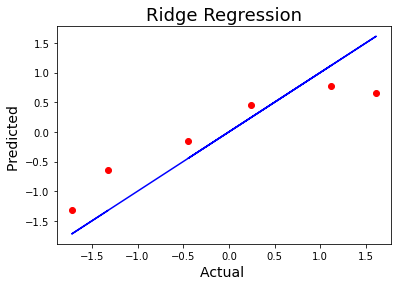

In [215]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

This got worse than Lasso Regression.

<AxesSubplot:xlabel='W', ylabel='Density'>

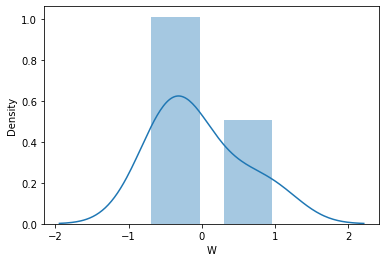

In [217]:
sns.distplot((y_test-pred_rd),bins=5)

# Model 5: Random Forest Regressor

In [236]:
r_score=0
for i in range(0,70):
    X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = i,test_size=0.20)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    y_pred = rfr.predict(x_test)
    
    r2=r2_score(y_test,y_pred)
    if r2>r_score:
        r_score=r2
        state=i
print("Final score",state," is ",r_score)

Final score 47  is  0.6960836267605635


In [242]:
rf_reg_params =  { 'max_depth': [5,10], "criterion": ["squared_error", "absolute_error", "poisson"],
                  'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [100,150,200],"n_jobs":[4],"random_state":list(range(45,50))}
rand_rf_reg = RandomizedSearchCV(RandomForestRegressor(), rf_reg_params)

rand_rf_reg.fit(X_train, y_train)

rf_reg = rand_rf_reg.best_estimator_
print(rf_reg)
print("Best Estimators for Random Forest Regression: ", rand_rf_reg.best_params_)
print("------------------------------------------")
print("best r2 score: ",rand_rf_reg.best_score_)

RandomForestRegressor(criterion='poisson', max_depth=10, max_features='log2',
                      n_estimators=200, n_jobs=4, random_state=47)
Best Estimators for Random Forest Regression:  {'random_state': 47, 'n_jobs': 4, 'n_estimators': 200, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'poisson'}
------------------------------------------
best r2 score:  -0.6302764077863101


In [243]:
rf = RandomForestRegressor(max_depth=10, n_estimators=200,n_jobs=4, random_state=47,max_features="log2",criterion="poisson")
rf.fit(X_train, y_train)
pred_rf= rf.predict(X_test)

In [244]:
rfr2 = r2_score(y_test,pred_rf)

for k in range(2,10):
    rfscore=cross_val_score(rf,x,y,cv=k)
    rfcv=rfscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rfcv*100)
    print("r2 score is : ",rfr2*100)
    print("\n")

At cv=  2
Cross Val score :  -24.490409241483533
r2 score is :  -32.897579402899254


At cv=  3
Cross Val score :  -34.662839311830325
r2 score is :  -32.897579402899254


At cv=  4
Cross Val score :  -11.947308448315304
r2 score is :  -32.897579402899254


At cv=  5
Cross Val score :  -38.707826577091254
r2 score is :  -32.897579402899254


At cv=  6
Cross Val score :  -25.347147808898058
r2 score is :  -32.897579402899254


At cv=  7
Cross Val score :  -40.14126904111817
r2 score is :  -32.897579402899254


At cv=  8
Cross Val score :  -71.11168451289073
r2 score is :  -32.897579402899254


At cv=  9
Cross Val score :  -2758.2709466718215
r2 score is :  -32.897579402899254




In [245]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

MAE: 1.3440783237482308
MSE: 1.9988154055505252
RMSE: 1.413794682954539


<AxesSubplot:xlabel='W', ylabel='Density'>

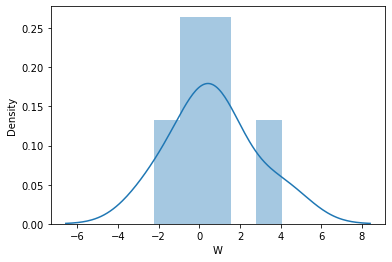

In [247]:
sns.distplot((y_test-pred_lr),bins=5)

Even though the distribution looks normal, RMSE and r2 score are the lowest among the 5 models.

# Saving the model

In [249]:
import pickle

In [289]:
filename = "Baseball_Win_pred.pkl"
pickle.dump(ls,open(filename,'wb'))

# Conclusion:

**As we can see from the metrics and the r2 score , Lasso Regression emerges at the top with the cv score being 0.7546599 
and the r2 score being  0.8713205 which means our model reaches the maximum accuracy of 87.1%.**

In [290]:
h = np.array(y_test)
predicted = np.array(pred_ls)
df_comp = pd.DataFrame({"original":h, "predicted":predicted},index=range(len(h)))
df_comp

,original,predicted
0,-1.328158,-0.993875
1,-1.720184,-1.407512
2,1.612039,0.837916
3,-0.446099,-0.256018
4,0.239947,0.347189
5,1.122006,0.597651


In [291]:
r2_score(y_test,predicted)

0.871320598065134